In [7]:
install.packages("ROCR")

also installing the dependencies ‘gtools’, ‘gdata’, ‘caTools’, ‘gplots’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
require(readr)
require(C50)
require(caret)
require(ROCR)

Loading required package: readr
Loading required package: C50
Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2
Loading required package: ROCR
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [2]:
er_data <- as.data.frame(read_tsv("../data/all_genes_er_Data.tsv"))

Parsed with column specification:
cols(
  .default = col_double(),
  AMY1B = col_integer(),
  AMY1C = col_integer(),
  ANKRD20A1 = col_integer(),
  ANKRD20A2 = col_integer(),
  ANXA8L1 = col_integer(),
  APOC2 = col_integer(),
  APOC4 = col_integer(),
  ARL17B = col_integer(),
  BAGE2 = col_integer(),
  BAGE3 = col_integer(),
  BAGE4 = col_integer(),
  BAGE5 = col_integer(),
  BMS1P1 = col_integer(),
  BMS1P5 = col_integer(),
  BOLA2 = col_integer(),
  BOLA2B = col_integer(),
  BPY2 = col_integer(),
  BPY2B = col_integer(),
  BPY2C = col_integer(),
  C11orf52 = col_integer()
  # ... with 531 more columns
)
See spec(...) for full column specifications.


In [4]:
results <- C5.0(subset(er_data, select = -c(er_status_by_ihc, Sample)), as.factor(er_data$er_status_by_ihc),
                trials = 10, rules = T)
summary(results)


Call:
C5.0.default(x = subset(er_data, select = -c(er_status_by_ihc, Sample)), y
 = as.factor(er_data$er_status_by_ihc), trials = 10, rules = T)


C5.0 [Release 2.07 GPL Edition]  	Tue Jun 26 16:52:51 2018
-------------------------------

Class specified by attribute `outcome'

Read 1015 cases (23369 attributes) from undefined.data

-----  Trial 0:  -----

Rules:

Rule 0/1: (36/2, lift 4.1)
	GPX7 > 60.9124
	LOC338739 > 0.3049773
	->  class Negative  [0.921]

Rule 0/2: (253/39, lift 3.7)
	ESR1 <= 24.65893
	->  class Negative  [0.843]

Rule 0/3: (522/2, lift 1.3)
	ESR1 > 24.65893
	GPR151 <= 0
	GPX7 <= 60.9124
	OR6C1 <= 0.03537927
	PTHLH <= 24.50639
	->  class Positive  [0.994]

Rule 0/4: (671/7, lift 1.3)
	ESR1 > 24.65893
	LOC338739 <= 0.3049773
	->  class Positive  [0.988]

Rule 0/5: (307/6, lift 1.3)
	NKD1 <= 1.659888
	SLC7A5 <= 28.08066
	->  class Positive  [0.977]

Rule 0/6: (473/11, lift 1.3)
	ALG3 <= 78.75919
	MAPT > 8.696694
	->  class Positive  [0.975]

Rule 0/7: (303/7, lift 1.

In [3]:
er_expr <- as.matrix(sapply(subset(er_data, select = -c(er_status_by_ihc, Sample)), as.numeric))

target.er_data <- as.factor(er_data$er_status_by_ihc)

colnames(er_expr) <- make.names(colnames(er_expr))

In [18]:
#sink(file = "../results/ER/c50_trees.txt", type = "output")
for (i in 1:10){
    partition <- createDataPartition(target.er_data, p = 0.66, list = F)

    results <- C5.0(er_expr[partition, ], target.er_data[partition], trials = 1, rules = F)
    capture.output(summary(results), file = "../results/ER/c50_trees.txt", append = T)

    predictions <- predict(results, er_expr[-partition, ], type = "prob")
    pred <- prediction(predictions[,2], target.er_data[-partition])
    auc.tmp <- performance(pred, "auc")
    auc <- as.numeric(auc.tmp@y.values)
    capture.output(print(auc), file = "../results/ER/c50_trees.txt", append = T)
}



#sink()


In [19]:
#sink(file = "../results/ER/c50_trees.txt", type = "output")
for (i in 1:10){
    partition <- createDataPartition(target.er_data, p = 0.66, list = F)

    results <- C5.0(er_expr[partition, ], target.er_data[partition], trials = 1, rules = T)
    capture.output(summary(results), file = "../results/ER/c50_rules.txt", append = T)

    predictions <- predict(results, er_expr[-partition, ], type = "prob")
    pred <- prediction(predictions[,2], target.er_data[-partition])
    auc.tmp <- performance(pred, "auc")
    auc <- as.numeric(auc.tmp@y.values)
    capture.output(print(auc), file = "../results/ER/c50_rules.txt", append = T)
}



#sink()


In [20]:
#sink(file = "../results/ER/c50_trees.txt", type = "output")
for (i in 1:10){
    partition <- createDataPartition(target.er_data, p = 0.66, list = F)

    results <- C5.0(er_expr[partition, ], target.er_data[partition], trials = 5, rules = F)
    capture.output(summary(results), file = "../results/ER/c50_trees_5.txt", append = T)

    predictions <- predict(results, er_expr[-partition, ], type = "prob")
    pred <- prediction(predictions[,2], target.er_data[-partition])
    auc.tmp <- performance(pred, "auc")
    auc <- as.numeric(auc.tmp@y.values)
    capture.output(print(auc), file = "../results/ER/c50_trees_5.txt", append = T)
}



#sink()


In [17]:
#capture.output(summary(results), file = "../results/ER/c50_trees.txt")

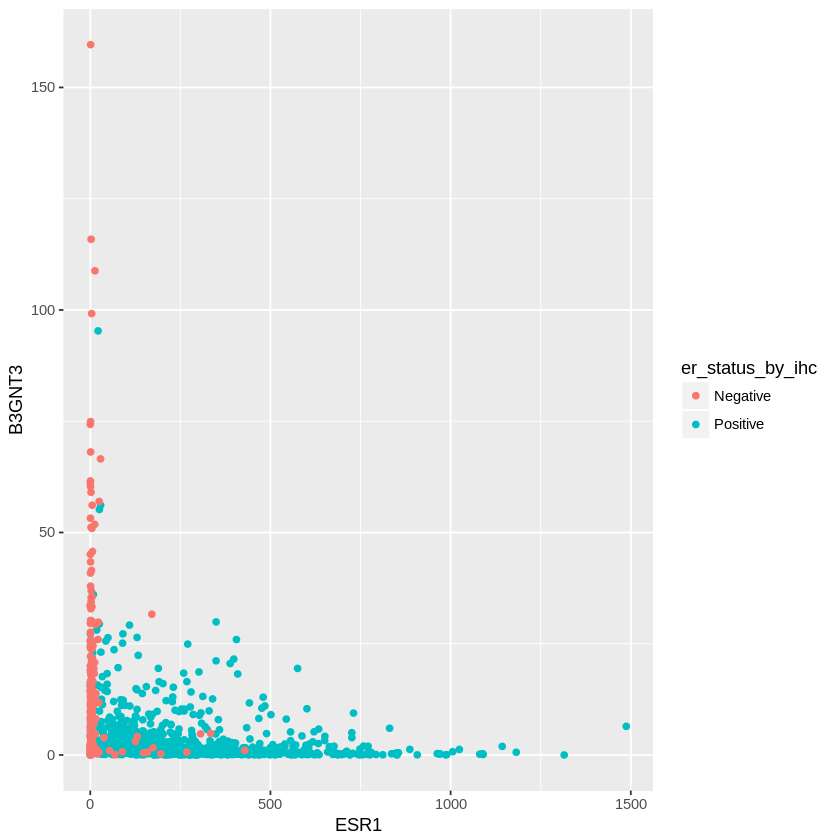

In [7]:
gdot <- ggplot(data = er_data, aes(x = ESR1, y = B3GNT3, color = er_status_by_ihc))

ggdot <- gdot + geom_point()

ggdot